Keras is a deep learning API that is written in Python that runs on top of Tensorflow.

It is quite popular among deep learning users because of its ease of use.

Tensorflow is an end to end open source deep learning framework developed and maintained by Google. 

Tensorflow allows for mathematical computations and manipulation between numerical tensors, runs on CPUs, GPUs, and TPUs. 

Keras was incorporated in Tensorflow 2.0 as tf.keras (high level API) and can run on the aforementioned hardwares. 

Tensorflow also allows for low-level operations with the Tensorflow Core API. 

In [1]:
pip install --upYgrade pip


Usage:   
  /opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: --upYgrade
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall tensorflowY


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
mnist = keras.datasets.mnist

(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

In [6]:
print("Training data: {}".format(train_images.shape,train_labels.shape))
print("Test data: {}".format(test_images.shape,test_labels.shape))
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels),class_labels))

Training data: (60000, 28, 28)
Test data: (10000, 28, 28)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label: 5')

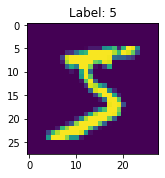

In [7]:
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

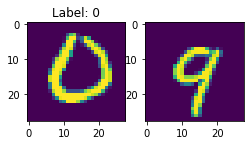

In [8]:
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

In [9]:
#scale dataset to range between 0 and 1
#pixel values range from 0 to 255
train_images = train_images/255.0
test_images = test_images/255.0

In [10]:
#split training data to training and validation sets 
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

#reshape data from 28 by 28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0],new_dimension)
x_val = x_val.reshape(x_val.shape[0],new_dimension)
test_images = test_images.reshape(test_images.shape[0],new_dimension)

In [11]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [12]:
#encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val,no_labels)
y_test = to_categorical(test_labels,no_labels)

Multilayer Perceptron
It is a supervised learning algorithm for binary classifiers that separates an input into 2 classes by learning linearly separable patterns. It is a single layer neural network that multiples input feature vectors by their weights, creates a weighted sum by summing these products then adds a bias and applies and activation function to give the final output 

Perceptrons are unable to solve complex problems that are not linearly separable. 

The MLP is a network of connected perceptrons stacked in layers with several hidden layers in between the input and output layers. 

When there is a single hidden layer, MLPs are referred to as vanilla neural networks. 

MLPS are feedforward neural networks where information is transferred in the forward direction from the input layer to the output layer. The input data to the network is fed to the input layer, computations are performed on the data in hidden layers and meaningful results returned in the output layer. The importance of the connections between layers is specified by the weights assigned. 

In [ ]:
1. Backpropagation and its derivative

Backpropagation is the method of traversing the neural network in reverse (from right to left) in order to obtain the gradient of neural network parameters with repect to a loss function. 
It is an iterative way of updating the weights in the network to get better predictions using a form of gradient descent until the minimum of the loss function is obtained.
Different loss functions can be selected for various tasks. 
The loss is reduced in a controlled manner by taking small steps from the starting point to the final point which is the lowest possible point.
The derivative of the loss function provides information on which direction to take when traversing. 
The weight can be updated using gradient descent. 
Backpropagation computes the sum of errors in the network to obtain the loss function, then the partial derivative of the loss function with respect to individual weights and using gradient descent to update the weights.

In [ ]:
2. Activation functions and neural networks hyperparameters

Activation functions introduce non-linearity into the output of a neuron in a network to determine the output. 
This non-linearity allows for the network to learn complex relationships between the input and response variables.
Without activation functions in an artificial neural network, there will only be linear transformations on the input. 
The non-linear functions also allow for back propagation because the gradients are obtained by the derivatives of the functions and used in updating weights. 
Some activation functions commonly used include sigmoid, tanh, relu, softmax, leaky relu and many more. 
When training the neural network, it is important to select the appropriate hyperparameters to improve the performance of the model.

In [ ]:
These are some of the hypeparameters:
1. Hidden layers
a measure of the learning capacity of the model, more hidden layers of neurons present in the network, the better the learning capacity of the mode. 
When too many layers than necessary are provided in a model, there is a tendency for overfitting to occur.
2. Learning rate
This controls how fast the model weights are updated before reaching optimal values. With a very small learning rate, it will take the model a long time to reach the desired weights.
In contrast, if the learning rate is much higher, the model might overshoot and pass the optimal point and prevent convergence of the algorithm.
This rate is how fast gradient descent is performed for backpropagation.
3. Dropout
This is used to shut a % of the neurons in the network to prevent overfitting
4. Batch size
The number of data samples that can be propagated through the network before weights are updated. This is important in breaking up huge datasets into sizeable batches to manage resources. 
For a dataset with 1000 samples and a batch size of 100, this means that there are 10 batches. 
5. Epoch
It is the number of cycles that the learning algorithm goes through the entire dataset. When all batches are fed once, epoch is completed. 

In [13]:
X = tf.placeholder(tf.float32, [None,new_dimension])
Y = tf.placeholder(tf.float32, [None,no_labels])

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
def multilayer_perceptron(x,no_classes, first_layer_neurons=256,second_layer_neurons=128):
    #first_layer
    first_weight=tf.Variable(tf.random_uniform[mew dimension, first_layer_neurons])
    first_bias=tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output=tf.nn.relu(tf.add(tf.matmul(x,first_weight),first_bias))
    #second_layer
    second_weight=tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons])
    second_bias=tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output=tf.nn.relu(tf.add(tf.matmul(first_layer_output),second_weight),second_bias)
    #output_layer
    final_weight=tf.Variable(tf.random_uniform([second_layer_neurons,no_classes]))
    final_bias=tf.Variable(tf.zeros([no_classes]))
    logits=tf.add(tf.matmul(second_layer_output,final_weight),final_bias)
    return logits

logits=multiplayer_perceptron(X,no_labels)
learning_rate=0.01
#we define the loss and optimiser for the network
loss_op=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y))
optimiser=tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op=optimiser.minimize(loss_op)
#initialize the variables
init=tf.global_variables_initializer()
epochs=20
batch_size=1000
iteration=len(x_train)//batch_size
                              
#train model
with tf.Session() as session:
    session.run(init)
    average_cost=0
    start,end=0
    batch_size
    for i in range(iteration):
        batch_x, batch_y = x_train[start:end],y_train[start:end]
        _, loss=session.run([train_op,loss_op],feed_dict={X:batch_x,Y:batch_y})
        start += batch_size
        end += batch_size
        #average loss
        average_cost += loss/iteration
    print("Epoch==========={}".format(epoch))

#evaluate model
prediction = tf.nn.softmax(logits)
ground_truth = tf.equal(tf.argmax(prediction,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(ground_truth,"float"))
print("Accuracy: {}".format(accuracy.eval({X:test_images,Y:test_labels})))

Common regularization for deep learning

Regularisation prevents overfitting in models
Models are also susceptible to overfitting.
Different methods have been developed to prevent overfitting.
L1 & L2 regularization, dropout, data augmentation and early stopping and regularization methods.

1.Dropout - this is a frequently used technique in DL where units are ignored (dropped out) in a neural network. A % of the neurons in each layer in the network are randomly selected and ignored such that they do not make any contribution in the forward and backward pass. 
This results in a much smaller network where the neurons left are required to handle the representations that would have been used for predictions by the missing neurons by learning more robust features. This process improves the generalization capabilities of the network and reduces overfitting on the training data. 

2. Early stopping - when a model is trained for a longer period such that the validation error starts to increase, overfitting is said to occur. In early stopping, while fitting the model on the training data and evaluating on the validation set, when the validation errors stops reducing or gets worse, the training process is terminated before the lowest training error is obtained to prevent overfitting.

3. Data Augmentation - training the model on a larger dataset is another way to prevent overfitting. It involves increasing the size of training set by introducing minor changes like rotating, cropping, flipping, translating, blurring to generate synthetic data from the dataset. 

Optimisation for training deep neural networks

When we solve DL problems, a loss function is defined to minimize the loss using an optimisation algorithm like:
1. Gradient descent
2. Gradient descent with momentum
3. Adagrad
4. RMSProp
5. Adam

There are several optimisation algorithms but there are also some challenges such as:
1.local minima
2. saddle points
3. vanishing gradients etc faced in DL optimisation

In [ ]:
Local minima

- Neural networks aim to continue updating weights until the global minimum (the lowest point of the entire network) is attained.
Local minima refer to the lowest points of localised portions of the graph.
The value of a loss function is minimum at a point in the local region. 
It isi possible for the function to be stuck at a local minimum because it is best point in that locality which makes it difficult to reach the global minimum where the lowest loss can be achieved.

Vanishing gradeints
- This is a problem that happens when training a network using gradient descent methods
it makes it difficult to update the weights in the earlier layers of the network and worsens as the number of layers increases. 
As we know, with gradient descent, the gradient controls how much learning happens in the network while training.
While backpropagating in deep neural networks , the gradoents tend to get smaller and with small gradients, little or no learning is done that is why resutlnig poor performance of models.